In [11]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

D:\Anaconda\Continuum\anaconda3\envs\py36\python.exe
3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 18:50:55) [MSC v.1915 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import os
# import codecs

In [13]:
target_url = ("export3.xlsx")
# target_url = ("C:/Dev/Projects/snow/data/export3.xlsx")

In [14]:
df = pd.read_excel(target_url)

In [15]:
#df.info()
#print(df.columns.values)

In [16]:
df.head()

,Number,Assignment_group,Priority,State,Category,Subcategory,Severity,Closure_CI,Location,Close_code,...,date,day,month,dom,week,week2,cluster,cluster1,cluster_name1,cluster_name
0,INC0489304,DH-Enterprise IT Service Cntr,4 - Low,Closed,Security,NaN,3 - Low,Network Account Issue,Mercy Medical Center Merced (MMCM),Application,...,2018-10-14,Sunday,October,14,2,2,14,4,login,login
1,INC0489303,DHE-Command Center,2 - High,Closed,Server,Windows,3 - Low,phx-vapp-835,Corporate Office - Phoenix 1,Resolved by Event,...,2018-10-14,Sunday,October,14,2,2,44,41,socket issue,cerner
2,INC0489302,DHE-Command Center,3 - Moderate,Closed,Server,Windows,3 - Low,phx-vprt-002,Corporate Office - Phoenix 1,Resolved by Event,...,2018-10-14,Sunday,October,14,2,2,7,1,utilization,utilization
3,INC0489301,DH-Enterprise IT Service Cntr,4 - Low,Closed,Application,NaN,3 - Low,Cerner Millennium FirstNet 2015.10.19,Community Hospital of San Bernardino (CHSB),Application,...,2018-10-14,Sunday,October,14,2,2,37,25,access,access issue
4,INC0489300,DHE-Command Center,3 - Moderate,Closed,Server,Windows,3 - Low,bmh-vapp-002,Corporate Office - Phoenix 1,Resolved by Event,...,2018-10-14,Sunday,October,14,2,2,7,1,utilization,utilization


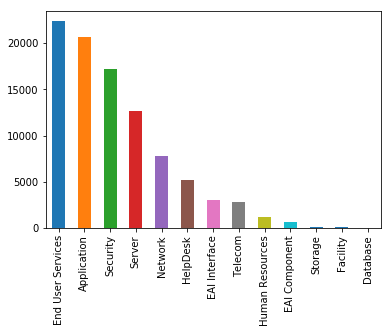

In [17]:
# plot few charts to understand the data

# Category by count - this should help understand "Number of Clusters" we should have

top_categories_df = df['Category'].value_counts()[:20]
top_categories_df.plot.bar(x = 'Category', y = 'Counts')

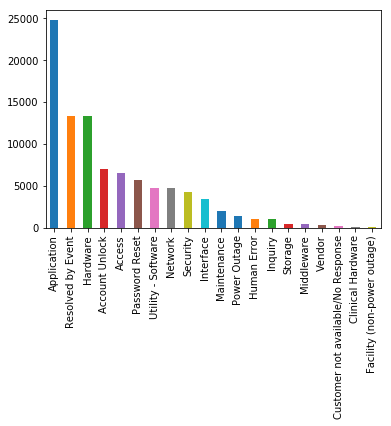

In [18]:
# Close_code by count 

top_close_code_df = df['Close_code'].value_counts()[:20]
top_close_code_df.plot.bar(x = 'Close_code', y = 'Counts')

In [19]:
# based on the 2 charts above we will go with 30 - 50 clusters of data

In [20]:
# identify the cols needed
cols = ['Number', 'Assignment_group', 'Priority', 'State', 'Category',
       'Subcategory', 'Severity', 'Closure_CI', 'Location', 'Close_code',
       'Configuration_item',  'Contact_type',
       'Duration', 'Impact', 'Short_description', 'Created']
df = df[cols]

In [21]:
# copy the dataframe to a new dataframe before any row deletes
test = df.copy()

In [22]:
# check for duplicate data
test[test['Short_description'].duplicated(keep = 'first')].sort_values('Short_description').head(5)

,Number,Assignment_group,Priority,State,Category,Subcategory,Severity,Closure_CI,Location,Close_code,Configuration_item,Contact_type,Duration,Impact,Short_description,Created
27124,INC0515038,DH-SC-EUS Marian,4 - Low,Closed,Security,NaN,3 - Low,McAfee Agent,Corporate Office - Phoenix GAT,Middleware,"McAfee AV, ASW or EPO",Phone,69495,No Impact,"""Notification Text: AMCORE out of Date <Works...",2018-10-29 13:34:39
39335,INC0502480,DH-SC-EUS NLA NrthrdgRoscoe,4 - Low,Closed,Security,NaN,3 - Low,"McAfee AV, ASW or EPO",Corporate Office - Phoenix GAT,Security,"McAfee AV, ASW or EPO",Phone,98375,No Impact,"""Notification Text: AMCORE out of Date <Works...",2018-10-22 13:34:52
37882,INC0503977,DH-ClinApps HIM,4 - Low,Closed,Application,NaN,3 - Low,Cerner CPDI Kofax,Woodland Healthcare Davis,Application,Cerner Millennium Provider Doc 2015.01.19,Self-service,6784,Down for One IT Customer,Cerner CDI Work Queue Monitor - Not Receiving...,2018-10-23 09:19:22
38013,INC0503842,DH-ClinApps HIM,3 - Moderate,Closed,Application,Revenue Cycle,3 - Low,Cerner CPDI Kofax,Dignity Health Medical Group-Sierra Nevada-Gra...,Application,CAREB Cerner Millennium HIM,Phone,27464,Degraded for One IT Customer,Cerner CDI Work Queue Monitor - Not Receiving...,2018-10-23 08:52:42
37900,INC0503959,DH-ClinApps HIM,4 - Low,Closed,Application,NaN,3 - Low,Cerner CPDI Kofax,Methodist Hospital of Sacramento (METH),Application,Kofax Capture v11,Phone,7047,No Impact,Cerner CDI Work Queue Monitor - Not Receiving...,2018-10-23 09:15:30


In [23]:
# remove duplicates, we will still retain 1 row for analysis
test = test.drop_duplicates('Short_description', keep = 'first')
print('Shape of the modified dataframe ', test.shape)

Shape of the modified dataframe  (61556, 16)


In [24]:
#Filter out some categories with instances < 50 for now , remove this filter in future
# test = incs.groupby("Category").filter(lambda x: len(x) > 50)
# test = incs.reset_index(drop = True)
test.Category.value_counts()

Application          15451
End User Services    14865
Security             11313
Network               6114
Server                5809
HelpDesk              2817
Telecom               1267
EAI Interface         1184
Human Resources       1024
EAI Component          295
Storage                116
Facility                99
Database                 2
Name: Category, dtype: int64

In [25]:
pd.options.display.max_colwidth = 100

In [26]:
# remove any accent from letters
def unidecode_text(text):
    try:
        text = unidecode.unidecode(text)
    except:
        pass
    return text

for col in ['Location', 'Short_description']:
    test[col] = test.apply(lambda row: unidecode_text(row[col]), axis = 1)

In [27]:
# copy location to another data frame and remove duplicates
locations = test['Location']
locations = locations.drop_duplicates(keep = 'first')
locations.head()

0             Mercy Medical Center Merced (MMCM)
1                   Corporate Office - Phoenix 1
3    Community Hospital of San Bernardino (CHSB)
5                        Sequoia Health Services
8                   Mercy General Hospital (MGH)
Name: Location, dtype: object

In [28]:
# stop words for location

# nltk text preprocessing
import string
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import contractions

stop = stopwords.words('english')
lemmer = WordNetLemmatizer()

# add punctuations to the stop words
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop.extend(punc)

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def get_locations(text):

    # lower case
    text = text.lower()
#     text = text.str.lower()

    # replace '\', '/', '|', '-' with spaces, thes are usually entered to separate words
    # word tokenize doesn't tokenize on these
    text = re.sub(r'[.=\\/\|-]',' ', text)

    # replace contractions
    text = ' '.join(contractions.fix(word) for word in text.split())
#     text = text.apply(lambda x: ' '.join(contractions.fix(word) for word in x.split()))
    
    # tokenize text and remove puncutation, strip would remove from word begining or end
    text = [word.strip(string.punctuation) for word in word_tokenize(text)]
#     text = text.apply(lambda x: ' '.join(word.strip(string.punctuation) for word in word_tokenize(x)))
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
#     text = text.apply(lambda x: ' '.join(word for word in word_tokenize(x) if not any(c.isdigit() for c in word)))

    # remove small tokens
    text = [word for word in text if len(word) > 1]
#     text = text.apply(lambda x: ' '.join(word for word in word_tokenize(x) if len(word) > 1))
    
    # remove stop words
    text = [word for word in text if word not in set(stop)]
#     text = text.apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in set(stop)))
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [lemmer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
#     text = text.apply(lambda x: ' '.join(lemmer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tag(x)))
    
    text = ' '.join(text)
    
    return(text)
    
# locations_cleaned = get_locations(locations.astype(str))
locations_cleaned = locations.apply(lambda x: get_locations(str(x)))

In [29]:
locations_cleaned.head()

0          mercy medical center merced mmcm
1                  corporate office phoenix
3    community hospital san bernardino chsb
5                    sequoia health service
8                mercy general hospital mgh
Name: Location, dtype: object

In [30]:
# use the countvectorizer to convert to a list of words
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit_transform(locations_cleaned.values)

stop_locations = vectorizer.get_feature_names()
len(stop_locations)

498

In [31]:
stop_locations[100:110]

['deactivate',
 'department',
 'detention',
 'development',
 'dhmf',
 'dhmg',
 'dhmgn',
 'dhmso',
 'diabetes',
 'diagnostic']

In [32]:
# extend stop words
# words like issue, problem, resolve, fix - do not add more sense to the description and are common
new_stopwords = ['chw','edu','phx','vapp', 'issue', 'issues', 'problem', 'problems', 'loc','do','es',
                 'resolve', 'resolved', 'fix', 'fixed']

stop.extend(new_stopwords)

# add the locations to the stop words
stop.extend(stop_locations)


def pre_process(text):

    # lower case
    text = text.lower()

    # replace '\', '/', '|', '-' with spaces, thes are usually entered to separate words
    # word tokenize doesn't tokenize on these
    text = re.sub(r'[.=\\/\|-]',' ', text)

    # replace contractions
    text = ' '.join([contractions.fix(word) for word in text.split()])

    # "'d": changes to " would", 'disk changes to wouldisk - unwanted contraction
    # replace wouldisk with disk
    text = text.replace('wouldisk', 'disk')  # replace with disk    

    # 'not able' is a common way to report issue, replace 'not able' with 'unable'
    # also not gets removed as part of stop words
    text = text.replace('not able', 'unable')
    text = text.replace('user id', 'user')
    text = text.replace('username', 'user')
    
    # replace ms4 to medseries
    text = text.replace('ms4', 'medseries')
    
    # there are lot of places in the description where II (2 caps I) has been used as separator
    # this gets converted to small letter (ii) with high occurance, drop these letters
    text = text.replace(' ii ', ' ')  # replace with spaces
        
    # tokenize text and remove puncutation, strip would remove from word begining or end
    text = [word.strip(string.punctuation) for word in word_tokenize(text)]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]

    # remove small tokens
    text = [word for word in text if len(word) > 2]
    
    # remove stop words
    text = [word for word in text if word not in set(stop)]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [lemmer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # some verbs probably get tagged as noun and are not lemmatized
    text = [lemmer.lemmatize(word, pos = 'v') for word in text]
    
    text = ' '.join(text)    
  
    return (text)
    
# cleaned_short_desc = pre_process(incs['Short_description'].astype(str))
%time cleaned_short_desc = test['Short_description'].apply(lambda x: pre_process(x))

Wall time: 1min 26s


In [33]:
cleaned_short_desc[0:20]

0                                                                                          password reset
1                                                         ping packet percentage see additional info time
2                                                          vprt cpu utilization threshold set utilization
3                                                                       cerner unable access correct view
4                                                               cpu utilization threshold set utilization
5              unable login user acc lock unlock acc hduv do password reset do able login change password
6                                                                         active job complete exit status
7                                                   vctx utilization threshold set disk file percent full
8                                                              medseries unable login user svillaraza dev
9                                             

In [34]:
# count of cells with no terms
print(cleaned_short_desc.apply(lambda x: x == '').sum())

75


In [35]:
def get_ips(text):
    
    # lower case
    text = text.str.lower()
    
    # capture the IPs    
    ip_pattern = re.compile(r'((-?)([A-Za-z0-9]{1,}[-.]{1,1}){2,6}([A-Za-z0-9]*))')  
    ip = text.apply(lambda x: ' '.join(word for word in re.split('[\': (),]', x) if ip_pattern.match(word)))
    
    return ip

ips = get_ips(test['Short_description'])

In [36]:
ips[0:20]

0                             
1                10.248.100.25
2         phx-vprt-002.chw.edu
3                             
4         bmh-vapp-002.chw.edu
5                             
6                             
7         phx-vctx-114.chw.edu
8                             
9     10.217.114.136//assisted
10                            
11         phx-app-030.chw.edu
12                            
13         phx-app-030.chw.edu
14                            
16                            
17                            
18        bmh-vapp-002.chw.edu
19        phx-vprt-002.chw.edu
20                            
Name: Short_description, dtype: object

In [37]:
# add the processed text and extracted ips to dataframe
test['Terms'] = cleaned_short_desc
test['IPs'] = ips

In [38]:
# drop the rows where 'Terms' column is spaces
# test = test[test['Terms'] != '']

In [39]:
# this cell is just for testing regex, etc
# import re

# print(re.split('[:\' ]', '\'phx-vapp-689.chw.edu\': Utilization is \'85.2\'. Threshold is set to \'Disk/File System/{C}/percent full >= 85\''))

# ip_pattern = re.compile(r'((-?)([A-Za-z0-9]{1,}[-.]{1,1}){2,6}([A-Za-z0-9]*))') 

# print(ip_pattern.match('phx-vapp-238.chw.edu'))
# print(ip_pattern.match('CPU Utilization is '))
# print(ip_pattern.match('85.2'))
# print(ip_pattern.match('10.250.243.2'))
# print(ip_pattern.match('-10.248.84.17'))
# print(ip_pattern.match('192.168.2.85)'))
# print(ip_pattern.match('10.1.5.100'))


# test = pd.DataFrame({'strings': ['...', 'a(b$c']})
# test.strings.str.replace('[^a-zA-Z ]', ' ')

# print('This is a test in spite.'.split())
# print(lemmer.lemmatize('physicians', pos='v'))
# text = "SMMC-////\\\\_||||==SF sdcchmc_lis.chw.edu"
# text = re.sub(r'[.=\\/\|-]',' ', text)
# print(text)

# alpha = re.compile(r'([A-Za-z/\-]*$)')

# dk = pd.DataFrame({'sentences': ['This is a very MS4 ABCD901 \'abc.xyz.109.01\' good site. I will recommend it to others.', 
#                                  'Can you please give me a call at 9983938428. have issues with the listings.', 
#                                  'WOW / Workstation on Wheels || WOW / Workstation on Wheels Issue',
#                                  '\'phx-vapp-689.chw.edu\': Utilization is \'85.2\'. Threshold is set to \'Disk/File System/{C}/percent full >= 85',
#                                  'Clairvia/not able to login//password reset hduv done jmoyrong/issue resolved',
#                                  'God is Great/I won a lottery.',
#                                  'CIM_2_BAYDSC19_MSFCHGX:MSF19CHGX:MedSeries 4:TIER-2 P05:DESTINATION_REALTIME:No host at ipAddress -10.248.84.17, listening on port -21529. :Charges - Multiple t',
#                                  'Account Lock ||  Not able to login || user id-adeperalta001',
#                                  'good work! keep it up, couldn\'t able to login, couldn\'t connect']})

# dk['tokenized_sents']  = dk['sentences'].apply(lambda x: ' '.join(word for word in re.split('[\': (),]', x) if ip_pattern.match(word)))



# dk['tokenized_sents'] = dk['sentences'].apply(lambda x: ' '.join(word.lower() for word in x.split()))  # lower case
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join(contractions.fix(word) for word in x.split()))  # replace contractions

# dk['tokenized_sents'] = dk['tokenized_sents'].str.replace('not able', 'unable')
# dk['tokenized_sents'] = dk['tokenized_sents'].str.replace('[\/-]', ' ')  # replace them with spaces

# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if alpha.match(word)))
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join([lemmer.lemmatize(word, pos='v') for word in word_tokenize(x)]))       #lemma
# dk['tokenized_sents'] = dk['tokenized_sents'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in set(stop)]))   #stop

# print(dk['tokenized_sents'])

In [40]:
# view the terms column just before feature extraction
test['Terms'][1470:1490]

2036    teresa cerda unable login team name change check record user change tcerda inform user
2037                                                                outlook get window pop dev
2038                                                    desktop unable access get black screen
2040                                                   account unable login user hduv pas rese
2041                                                         emily powerchart scan button grey
2044                                                                        user want register
2045                                                             emergency account disablement
2047                                                         timothy newcomb duo need activate
2048                                                                           printer install
2049                                      phone phone need someone put together head set phone
2051                                        try op

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(max_features=10000, max_df=0.8, min_df=0.0005,                                  
#                                   use_idf=True, tokenizer=word_tokenize, ngram_range=(1,3))

vectorizer = TfidfVectorizer(max_features = 5000, # stop_words = stop,                               
                                  use_idf = True, tokenizer = word_tokenize, ngram_range = (1,1))

%time X = vectorizer.fit_transform(test['Terms'].values)

print(X.shape)

Wall time: 6.18 s
(61556, 5000)


In [42]:
features = vectorizer.get_feature_names()
freq = sum(X).toarray()[0]
test_features = pd.DataFrame(freq, index = features, columns = ['frequency'])

# sort the terms in descending order of frequency
test_features.sort_values(by = ['frequency'], inplace = True, ascending = False)

In [43]:
# print the top 50 occurances
print(test_features[0:50])

               frequency
unable       3837.009543
user         3803.262107
login        3469.188638
account      2713.744544
password     1816.811290
lock         1542.184627
reset        1539.751015
need         1450.151464
device       1432.216117
mdf          1286.985527
dev          1271.891144
medseries    1163.469980
main         1085.098650
printer      1075.841505
status       1049.887113
cerner       1029.284127
error         962.004368
access        955.825532
computer      890.724398
utilization   888.405575
job           886.574505
do            884.611608
unlock        850.729371
desktop       849.592046
up            845.963240
smart         840.725912
set           832.457446
file          781.566099
able          775.885618
work          769.809262
duo           754.586216
threshold     737.802667
hduv          736.355213
associate     682.683409
controller    680.754637
print         645.339444
full          638.917250
complete      626.613635
disk          621.274561


In [44]:
# print the last 20 occurances - terms with low frequency
# how low is the frequency? do we have correct number of features
print(test_features.tail(20))

            frequency
gmhmed       0.681759
ipa          0.671874
junk         0.664677
sell         0.658289
synonym      0.655643
ri           0.654936
woodrd       0.646431
nvnlv        0.642154
nvbd         0.641287
rlenz        0.639648
sbmcclin     0.634918
speechq      0.630863
ssrnet       0.607296
hambleton    0.603334
reaso        0.580431
smartwrite   0.573038
sakuru       0.573038
httpd        0.554465
httpserver   0.528130
sophia       0.521252


In [45]:
print(features[4900:5000])

['workplace', 'workroom', 'worksheet', 'workstation', 'world', 'wou', 'would', 'wouldh', 'wouldsc', 'woundcare', 'woundexpert', 'wow', 'wpo', 'wpobre', 'wpot', 'wqm', 'wright', 'wrinkle', 'wrist', 'wristband', 'write', 'writer', 'wroking', 'wrong', 'wrongly', 'wrwill', 'wsarkis', 'wsiebert', 'wts', 'wvillanueva', 'www', 'xcalderon', 'xcelera', 'xen', 'xenapp', 'xenn', 'xerox', 'xlarchve', 'xlbackup', 'xlcube', 'xlcubed', 'xlin', 'xmatters', 'xml', 'xnguyen', 'xper', 'xpercon', 'xray', 'xrays', 'xtend', 'xtra', 'xxi', 'yaguda', 'yahoo', 'yan', 'yarbrough', 'yasuko', 'ycabas', 'ycabasantana', 'year', 'yellow', 'yes', 'yesterday', 'yet', 'ygee', 'ykamto', 'ymadkins', 'ynguyengar', 'ynunez', 'yolo', 'yosemite', 'youtube', 'yparamo', 'ypetrishin', 'yporter', 'ysessions', 'yun', 'yvette', 'zapata', 'zara', 'zary', 'zda', 'zebra', 'zelkhoury', 'zen', 'zenapp', 'zero', 'zhang', 'ziedler', 'ziegelmayer', 'zimportdb', 'zip', 'zjaleco', 'zlegaspi', 'zone', 'zoom', 'zother', 'zrosado', 'zweingarte

In [46]:
# using elbow method to find optimum number of clusters - start with 30 clusters

# from sklearn.cluster import KMeans
# wcss = []

# for i in range(30, 51):
#     km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 1)
#     km.fit(X)
#     wcss.append(km.inertia_)
 
# optimal_clusters = np.argmin(wcss) + 2 # As argmin return the index of minimum loss.

# plt.plot(range(30, 51), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

# print ("The optimal number of clusters obtained is - ", optimal_clusters)
# print ("The loss for optimal cluster is - ", min(wcss))

In [47]:
num_clusters = 50

# KMeans
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
# %time y = kmeans.fit_predict(X)
# %time kmeans.fit(X)

# Mini Batch KMeans
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters = num_clusters, init = 'k-means++', 
                         max_iter = 300, n_init = 3, random_state = 1)
%time kmeans.fit(X)

# clusters = kmeans.labels_.tolist()

Wall time: 1.15 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=300, max_no_improvement=10, n_clusters=50,
        n_init=3, random_state=1, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [48]:
# check the number of rows in data frame and the labels
print(len(kmeans.labels_))
print(test.shape)

61556
(61556, 18)


In [49]:
# copy the kmeans.labels_ as Cluster column
test['Cluster'] = kmeans.labels_

In [50]:
# print terms to cluster mapping
print(test.loc[:10,['Terms', 'Cluster']])

                                                                                                  Terms  \
0                                                                                        password reset   
1                                                       ping packet percentage see additional info time   
2                                                        vprt cpu utilization threshold set utilization   
3                                                                     cerner unable access correct view   
4                                                             cpu utilization threshold set utilization   
5            unable login user acc lock unlock acc hduv do password reset do able login change password   
6                                                                       active job complete exit status   
7                                                 vctx utilization threshold set disk file percent full   
8                                    

In [51]:
# Save cluster in pickle file for future use
# import pickle

# pickle.dump(km, open('pkl/km_1.pkl', 'wb'))

In [52]:
# order_centroids = kmeans.cluster_centers_.argsort()[:,-1:-51:-1]
# for num, centroid in enumerate(order_centroids):
#     print(str(num) + ' : ' + ', '.join(features[word] for word in centroid))
    
# Create mapping of ngram features into clusters, 
# save into terms map object with key as cluster name (first feature in each cluster - with 2 words)
# terms = top 50 ngram features

order_centroids = kmeans.cluster_centers_.argsort()[:, :51:-1]

terms_map = pd.DataFrame(index = np.arange(0, num_clusters), columns = ['features','key'])    
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    #terms_map['key'] = i
    list = [] 
    for ind in order_centroids[i, :50]:
        print(' %s' % features[ind], end=',')
        list.append(features[ind])
    for ind2 in order_centroids[i, :1]:
        terms_map.key.loc[i] = features[ind2]

    str = ', '.join(list) 
    terms_map.features.loc[i] = str
    print()
print(terms_map.shape)

Cluster 0: alarm, up, smart, device, srt, nst, mdf, tower, hlt, morrison, mfh, hartnell, att, sanjuan, guest, main, anc, rehab, sldc, hiec, sonoma, sld, dsch, whc, edcenter, cmp, psa, pfs, occ, sont, vida, woundcare, nrc, mpoe, mcb, pbx, mch, idf, mob, bofa, burn, angelscamp, elm, yolo, railsback, mtsj, corp, smlb, heather, height,
Cluster 1: account, lock, user, login, unable, acc, unlock, medseries, activate, able, axway, enable, allscripts, disable, get, clairvia, frequently, gecb, cerner, sac, need, name, intruder, error, mailgate, customer, frequent, dev, check, window, nup, access, remove, enup, time, flowcast, email, device, careaware, com, slentz, end, say, activation, claim, dept, first, emergency, bbuan, gate,
Cluster 2: outlook, email, unable, send, user, dev, device, receive, need, open, access, login, error, devid, phishing, mail, want, offline, get, delete, vault, take, address, pop, attachment, secure, archive, web, axway, owa, miss, work, view, customer, use, com, mailb

Cluster 21: temperature, value, high, edc_p, integrate, smart, up, rcchild, edc_t, meditech, humidity, main, edc_w, edc_ff, amcore, date, ahu, pdu, idf, mic, hie, hide, hhmmss, zzaheer, hhh_application, higherground, highlight, hill, hillmann, hiec, hglazebrook, hhc, hemoglobin, height, hello, help, helpdesk, hemisphere, hemo, hence, hhacker, hepler, hernandez, hespina, hfitzpatrick, hgamerow, hire, hilt, hlt, history,
Cluster 22: port, status, mdf, sensor, temp, high, temperature, value, smart, up, main, smlb, dmf, lvs, cath, master, hilt, elm, corp, morrison, pa, fou, srt, core, whc, please, colo, rehab, sld, guest, lompocoffice, roc, amb, replace, srdhsm, phxdc, slot, sldc, work, outbound, itc, nrc, utilization, disk, sjw, open, mfh, dsch, att, hlt,
Cluster 23: launch, unable, application, device, cerner, medseries, user, myjourney, dev, journey, citrix, impact, course, print, computer, chrome, error, take, desktop, powerchart, icon, nfuse, dept, devid, restart, website, google, bro

Cluster 41: laptop, internet, explorer, unable, dev, desktop, dept, connect, work, device, user, impact, need, connection, dep, turn, wifi, slow, website, login, error, dock, open, wow, get, browser, power, computer, charge, battery, devid, check, launch, available, access, instal, update, restart, logon, room, loaner, provide, floor, vpn, boot, properly, mcafee, window, application, slowness,
Cluster 42: ipaddress, listen, destination_realtime, host, tier, port, adt, order, workflowrx, document, omnicell, suite, provider, portal, nutrition, edm, result, millennium, allergy, service, abstract, generic, prod, nitiate, medseries, hub, identity, solution, domain, bridge, empi, multiple, mobilemd, aznv, informati, rad, charge, interface, joseph, john, ecisa, careb, vericis, medic, qsight, bedtracking, cnext, ecare, orde, dm,
Cluster 43: acc, unlock, lock, login, user, unable, enable, medseries, jfleshman, jnjoku, customer, jhaleem, thudock, account, vfabela, jyongco, eamparo, jmoyrong, nka

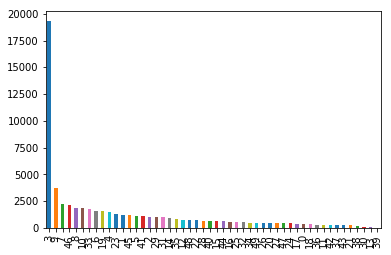

In [53]:
# analyze the clusters
top_clusters = test['Cluster'].value_counts()
top_clusters.plot.bar(x = 'Cluster', y = 'Counts')

In [60]:
# there is high volume for cluster 1, look at few to investigate
print(test[test.Cluster == 1]).head()

           Number               Assignment_group      Priority   State  \
138    INC0489164            DH-ClinApps Surgery  3 - Moderate  Closed   
236    INC0489066  DH-Enterprise IT Service Cntr       4 - Low  Closed   
247    INC0489055  DH-Enterprise IT Service Cntr       4 - Low  Closed   
281    INC0489021  DH-Enterprise IT Service Cntr       4 - Low  Closed   
356    INC0488944  DH-Enterprise IT Service Cntr       4 - Low  Closed   
598    INC0488700  DH-Enterprise IT Service Cntr       4 - Low  Closed   
614    INC0488684  DH-Enterprise IT Service Cntr       4 - Low  Closed   
625    INC0488673  DH-Enterprise IT Service Cntr       4 - Low  Closed   
677    INC0488621  DH-Enterprise IT Service Cntr       4 - Low  Closed   
705    INC0488592  DH-Enterprise IT Service Cntr       4 - Low  Closed   
765    INC0488532  DH-Enterprise IT Service Cntr       4 - Low  Closed   
790    INC0488507             DH-SW-EUS StJoseph       4 - Low  Closed   
956    INC0488341  DH-Enterprise IT Se

AttributeError: 'NoneType' object has no attribute 'head'

In [55]:
terms_map.to_csv('terms_map04.csv')


In [56]:
terms2=pd.read_csv('terms_map04.csv')
dict2 = terms2.key.to_dict()

In [57]:
test['cluster'] = kmeans.labels_
#dataframe map integer 'cluster' into text label 'cluster_name' using dict mapping (0->login)
test['cluster_name'] = test['cluster'].map(dict2)

test.head()

,Number,Assignment_group,Priority,State,Category,Subcategory,Severity,Closure_CI,Location,Close_code,...,Contact_type,Duration,Impact,Short_description,Created,Terms,IPs,Cluster,cluster,cluster_name
0,INC0489304,DH-Enterprise IT Service Cntr,4 - Low,Closed,Security,NaN,3 - Low,Network Account Issue,Mercy Medical Center Merced (MMCM),Application,...,Phone,213,No Impact,Network Password Reset,2018-10-14 23:56:41,password reset,,7,7,password
1,INC0489303,DHE-Command Center,2 - High,Closed,Server,Windows,3 - Low,phx-vapp-835,Corporate Office - Phoenix 1,Resolved by Event,...,Event,2373,Degraded for Multiple IT Customers,"'10.248.100.25': Ping packet good percentage is '0'%'. See ""Additional Info"" for timings",2018-10-14 23:52:57,ping packet percentage see additional info time,10.248.100.25,36,36,percentage
2,INC0489302,DHE-Command Center,3 - Moderate,Closed,Server,Windows,3 - Low,phx-vprt-002,Corporate Office - Phoenix 1,Resolved by Event,...,Event,592,Degraded for Multiple IT Customers,'phx-vprt-002.chw.edu':CPU Utilization is '100'. Threshold is set to 'utilization >= 95',2018-10-14 23:50:06,vprt cpu utilization threshold set utilization,phx-vprt-002.chw.edu,26,26,utilization
3,INC0489301,DH-Enterprise IT Service Cntr,4 - Low,Closed,Application,NaN,3 - Low,Cerner Millennium FirstNet 2015.10.19,Community Hospital of San Bernardino (CHSB),Application,...,Phone,386,No Impact,cerner||Unable to access the correct view||,2018-10-14 23:37:13,cerner unable access correct view,,8,8,access
4,INC0489300,DHE-Command Center,3 - Moderate,Closed,Server,Windows,3 - Low,bmh-vapp-002,Corporate Office - Phoenix 1,Resolved by Event,...,Event,597,Degraded for Multiple IT Customers,'bmh-vapp-002.chw.edu':CPU Utilization is '95'. Threshold is set to 'utilization >= 95',2018-10-14 23:35:30,cpu utilization threshold set utilization,bmh-vapp-002.chw.edu,26,26,utilization


In [59]:
test.shape

(61556, 21)

## apriori

In [137]:
test['list_terms'] =test['Terms'].str.split()


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#https://github.com/chris1610/pbpython/blob/master/notebooks/Market_Basket_Intro.ipynb
# pip install mlxtend==0.15.0.0
#https://pypi.org/project/mlxtend/0.15.0.0/
    
from sklearn.preprocessing import MultiLabelBinarizer

In [138]:

# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()

In [139]:
table = pd.DataFrame(one_hot.fit_transform(test.list_terms), 
                     columns=one_hot.classes_)
print(table.shape)

(61556, 17355)


In [140]:
table['cluster']=test.cluster
table =table.set_index('cluster')
print(table.shape)

(61556, 17354)


In [141]:
table.head()

,aaamoveobj,aaboseif,aaboytes,aabramson,aabrenica,aacc,aaccount,aacn,aadekile,aadriani,...,zsteric,zupar,zweingarten,zwoldesilasse,zyang,zzaheer,zzdefault,zzlallgower,zzz,¬disablement
cluster,,,,,,,,,,,,,,,,,,,,,
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#earlier was doing assignment groups as one hot encoded, but it did not work, 

#basket_sets.head()

,DH-ALMsupport,DH-AS400_Support,DH-BNI_Informatics,DH-ClinApps_CPOE,DH-ClinApps_Cardiology_and_Diagnostic_Solutions,DH-ClinApps_Charges,DH-ClinApps_Core,DH-ClinApps_Custom_MPage,DH-ClinApps_Custom_Program,DH-ClinApps_Environment,...,DHE-ServiceMatters_Data_Management,DHE-ServiceNow_System_Admin,DHE-SharePoint_SysAdmin,DHE-Software_Asset_Mgmt,DHE-TECHOPS_ERP_SysAdmin,DHE-TECHOPS_Web_SysAdmin,DHE-TS-DBA,DHE-TS-MIDRANGE-MEDITECH,DHE-TS-Unix,DHE-UC_Contact_Center
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,0,...,1,1,1,0,1,0,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# Build up the frequent items
%time frequent_itemsets = apriori(table, min_support=0.07, use_colnames=True)

frequent_itemsets.head()

Wall time: 1min 18s


,support,itemsets
0,0.108811,(account)
1,0.071642,(dev)
2,0.077474,(device)
3,0.181282,(login)
4,0.087595,(need)


In [143]:
# Create the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(account),(user),0.108811,0.253005,0.070001,0.643326,2.542738,0.042471,2.094336
1,(user),(account),0.253005,0.108811,0.070001,0.276679,2.542738,0.042471,1.232079
2,(login),(unable),0.181282,0.306989,0.162844,0.898288,2.926128,0.107192,6.813491
3,(unable),(login),0.306989,0.181282,0.162844,0.530455,2.926128,0.107192,1.743639
4,(login),(user),0.181282,0.253005,0.107528,0.593154,2.344430,0.061663,1.836060


In [134]:
rules[ (rules['lift'] >= 2) &
       (rules['confidence'] >= 0.6) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(account),(login),0.128858,0.193286,0.070926,0.550420,2.847692,0.046019,1.794372
2,(account),(user),0.128858,0.262047,0.079589,0.617647,2.357013,0.045822,1.930032
4,(login),(unable),0.193286,0.331890,0.179210,0.927171,2.793613,0.115060,9.173670
5,(unable),(login),0.331890,0.193286,0.179210,0.539967,2.793613,0.115060,1.753601
6,(login),(user),0.193286,0.262047,0.113698,0.588235,2.244774,0.063048,1.792173
8,(user),(unable),0.262047,0.331890,0.145642,0.555785,1.674609,0.058671,1.504025
10,"(login, user)",(unable),0.113698,0.331890,0.103952,0.914286,2.754789,0.066217,7.794622
11,"(login, unable)",(user),0.179210,0.262047,0.103952,0.580060,2.213578,0.056991,1.757285
12,"(unable, user)",(login),0.145642,0.193286,0.103952,0.713755,3.692731,0.075802,2.818259
13,(login),"(unable, user)",0.193286,0.145642,0.103952,0.537815,3.692731,0.075802,1.848521
